# GRIP - The Sparks Foundation 

### **Data Science and Business Analytics Intern at The Sparks Foundation**

**Problem Statement** - Find out the weak areas where we work to
make more profit.

#### Tej Pratap (SIT, CSE 2021)

### **Importing Liabraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

###**Loading Dataset**

In [3]:
superstore = pd.read_csv("C:\\Users\\adraj\\Downloads\\SampleSuperstore.csv")
superstore.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
superstore['Sales'].unique()

array([ 261.96 ,  731.94 ,   14.62 , ...,  437.472,   97.98 ,  243.16 ])

In [5]:
superstore.shape

(9994, 13)

In [6]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


###**Dataset summury**

In [7]:
superstore.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


###**Visualizing Correlation Matrix**

In [8]:
corr_mat = superstore.corr()
corr_mat

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [10]:
plt.rcParams['figure.figsize'] = (15,6)

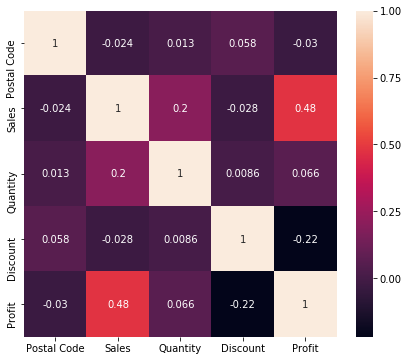

In [9]:
plt.figure(figsize=(7,6))
sns.heatmap(corr_mat, annot=True)

In [11]:
superstore['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

### **Superstore Category visualization**

Text(0.5,1,'Superstore Categories')

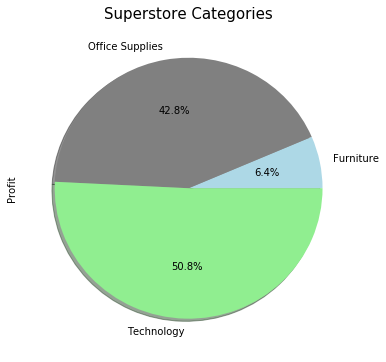

In [12]:
plt.figure(figsize=(6,6))
cat = superstore.groupby('Category')['Profit'].agg('sum')

cmap = plt.get_cmap('Spectral')
colors = ["lightblue", "gray", "lightgreen"]
cat.plot.pie(autopct="%1.1f%%", shadow=True, colors=colors, explode = (0.00, 0, 0))
plt.title("Superstore Categories",fontsize=15)

**Analysis** - This pie chart represents that category Technology has the highest Profit and Furniture has the lowest



Let's find out which State sells the most furniture and makes the least Profit

In [13]:
superstore_v1 = superstore[superstore["Category"] == 'Furniture']

In [16]:
superstore_v1

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
10,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Tables,1706.1840,9,0.20,85.3092
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
24,Standard Class,Consumer,United States,Orem,Utah,84057,West,Furniture,Tables,1044.6300,3,0.00,240.2649
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522
29,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Furnishings,124.2000,3,0.20,15.5250
36,First Class,Corporate,United States,Richardson,Texas,75080,Central,Furniture,Furnishings,190.9200,5,0.60,-147.9630


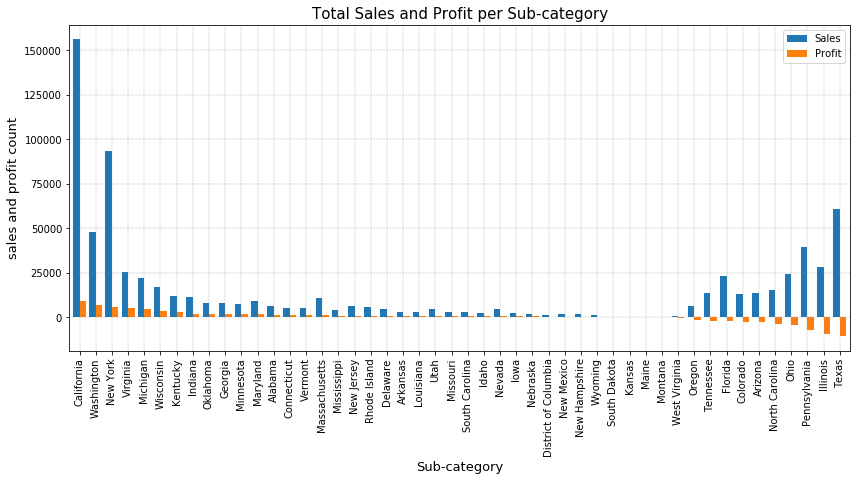

In [15]:
sale_profit_sum = superstore_v1.groupby('State')['Sales','Profit'].agg('sum')
sale_profit_sum = sale_profit_sum.sort_values(by="Profit",ascending=False)
sale_profit_sum.plot.bar(width=0.8,figsize=(14,6))
plt.title("Total Sales and Profit per Sub-category", fontsize=15)
plt.xlabel("Sub-category", fontsize=13)
plt.ylabel("sales and profit count",fontsize=13)
plt.grid(color='gray', linestyle='--', linewidth=0.3)

**Analysis** - This Graph shows, the store has wide variety of Office Supplies especially in Binders and Paper department.

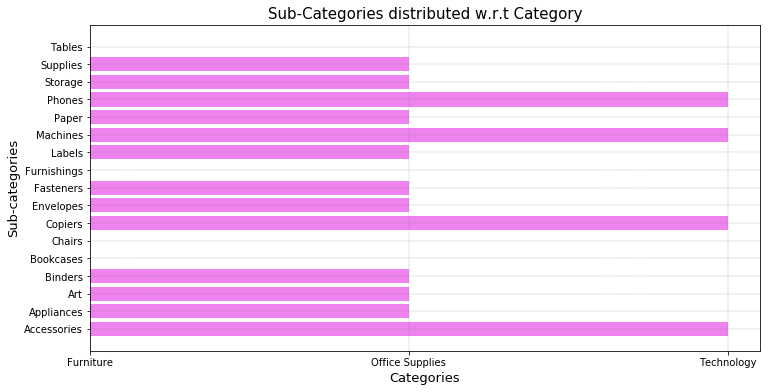

In [27]:
plt.figure(figsize=(12,6))
plt.barh('Sub-Category','Category', data=superstore, color='violet')
plt.xlabel("Categories",fontsize=13)
plt.ylabel("Sub-categories", fontsize=13)
plt.title("Sub-Categories distributed w.r.t Category",fontsize=15)
plt.grid(color='gray', linestyle='--', linewidth=0.3)

**Analysis** - From this graph, we can easily makeout which Category & Sub-Category to choose when they are looking to purchase a product

### **Visualize the total Sales and Profit by Sub-category**

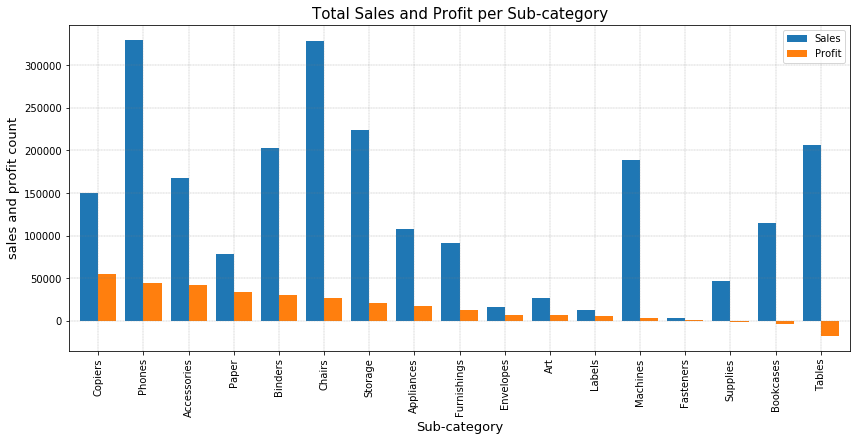

In [17]:
sale_profit_sum = superstore.groupby('Sub-Category')['Sales','Profit'].agg('sum')
sale_profit_sum = sale_profit_sum.sort_values(by="Profit",ascending=False)
sale_profit_sum.plot.bar(width=0.8,figsize=(14,6))
plt.title("Total Sales and Profit per Sub-category", fontsize=15)
plt.xlabel("Sub-category", fontsize=13)
plt.ylabel("sales and profit count",fontsize=13)
plt.grid(color='gray', linestyle='--', linewidth=0.3)

**Analysis** - Highest profit is earned in Copiers while Selling price for Chairs and Phones is extremely high compared to other products.

Another analysis is people dont prefer to buy Tables and Bookcases from Superstore. Hence these departments are in loss.

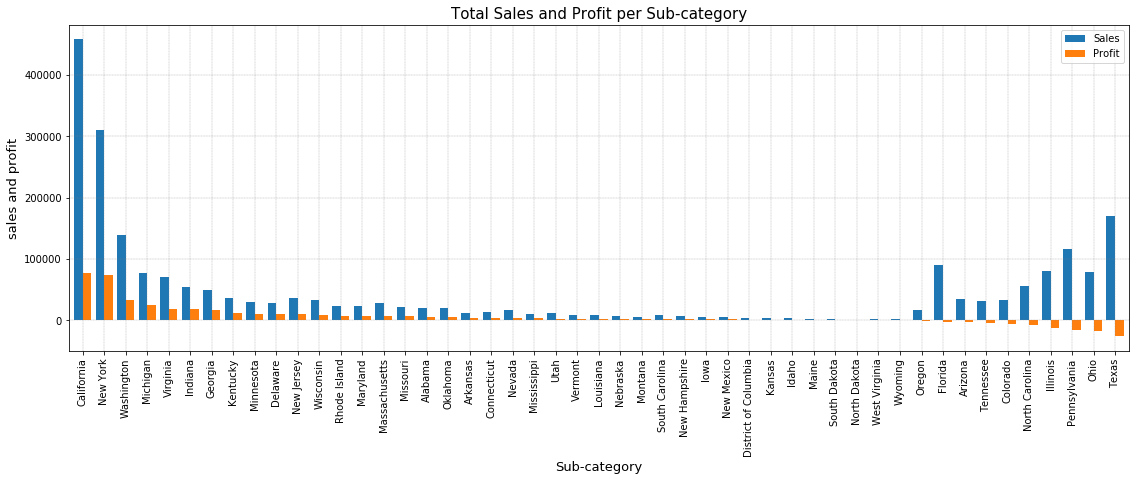

In [62]:
sale_profit_sum = superstore.groupby('State')['Sales','Profit'].agg('sum').reset_index()
sale_profit_sum = sale_profit_sum.sort_values(by="Profit",ascending=False)
sale_profit_sum = sale_profit_sum.set_index(sale_profit_sum.columns[0])
sale_profit_sum.plot.bar(width=0.8,figsize=(19,6))
plt.title("Total Sales and Profit per Sub-category", fontsize=15)
plt.xlabel("Sub-category", fontsize=13)
plt.ylabel("sales and profit",fontsize=13)
plt.grid(color='gray', linestyle='--', linewidth=0.3)

States - Texas, Ohio, Pennsylvania, Illinois, North Carolina are the bottom 5 states based on Profit

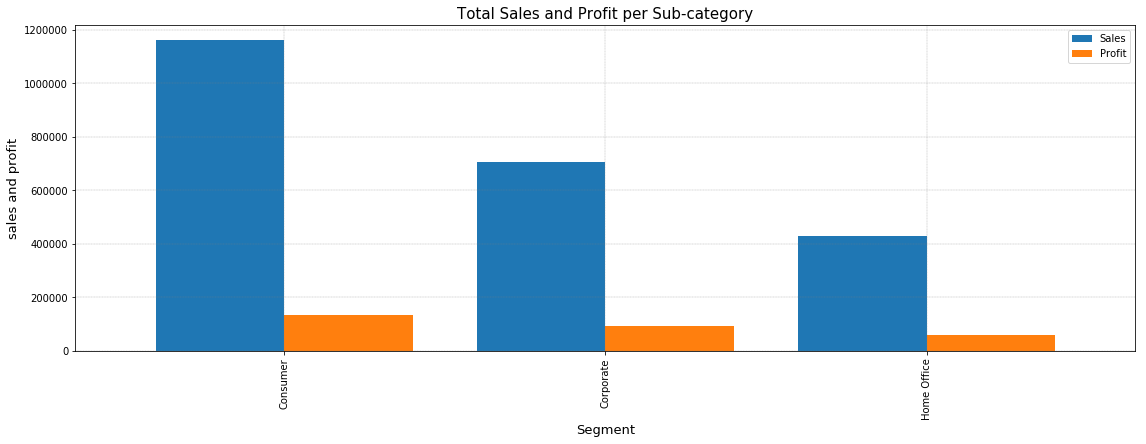

In [63]:
sale_profit_sum = superstore.groupby('Segment')['Sales','Profit'].agg('sum').reset_index()
sale_profit_sum = sale_profit_sum.sort_values(by="Profit",ascending=False)
sale_profit_sum = sale_profit_sum.set_index(sale_profit_sum.columns[0])
sale_profit_sum.plot.bar(width=0.8,figsize=(19,6))
plt.title("Total Sales and Profit per Sub-category", fontsize=15)
plt.xlabel("Segment", fontsize=13)
plt.ylabel("sales and profit",fontsize=13)
plt.grid(color='gray', linestyle='--', linewidth=0.3)

Home Office Segment makes the least profit

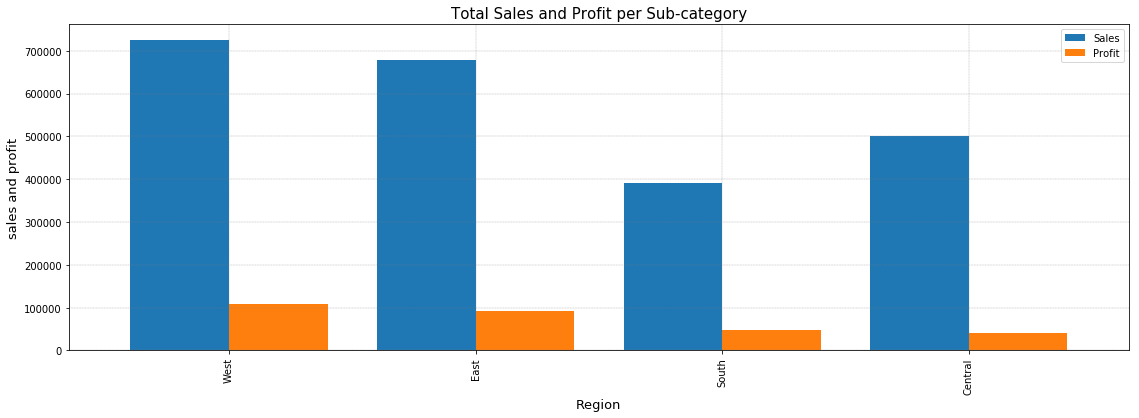

In [72]:
sale_profit_sum = superstore.groupby('Region')['Sales','Profit'].agg('sum').reset_index()
sale_profit_sum = sale_profit_sum.sort_values(by="Profit",ascending=False)
sale_profit_sum = sale_profit_sum.set_index(sale_profit_sum.columns[0])
sale_profit_sum.plot.bar(width=0.8,figsize=(19,6))
plt.title("Total Sales and Profit per Sub-category", fontsize=15)
plt.xlabel("Region", fontsize=13)
plt.ylabel("sales and profit",fontsize=13)
plt.grid(color='gray', linestyle='--', linewidth=0.3)

Even though we see a higher Sales in Central Region when compared to South, former reports the least Profit

### **Visualizing the how much prodcuts distributed regionwise**

**Analysis** - People residing in Western and eastern part of US tend to order more from superstore.

### **Finding the cost**

In [26]:
# adding new column 'Cost' in the existing dataset
superstore['Cost'] = superstore['Sales'] - superstore['Profit']
print(superstore.head())

        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit       Cost  
0      0.00   41.9136   220.0464  
1      0.00  219.5820 

### **Cost Visualization**

In [28]:
sale_profit_sum = superstore.groupby('Sub-Category')['Sales','Profit','Cost'].agg('sum').reset_index()
sale_profit_sum = sale_profit_sum.sort_values(by="Profit",ascending=False)

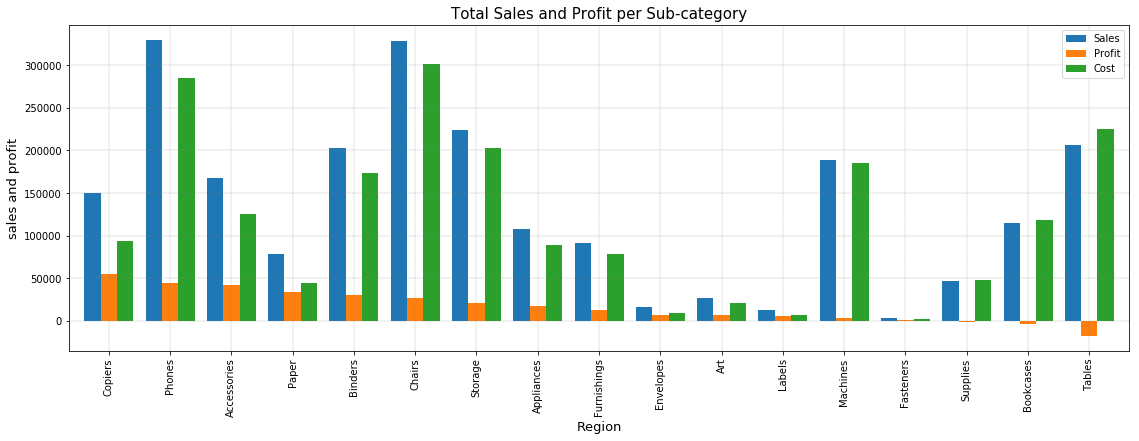

In [29]:
sale_profit_sum = sale_profit_sum.set_index(sale_profit_sum.columns[0])
sale_profit_sum.plot.bar(width=0.8,figsize=(19,6))
plt.title("Total Sales and Profit per Sub-category", fontsize=15)
plt.xlabel("Region", fontsize=13)
plt.ylabel("sales and profit",fontsize=13)
plt.grid(color='gray', linestyle='--', linewidth=0.3)

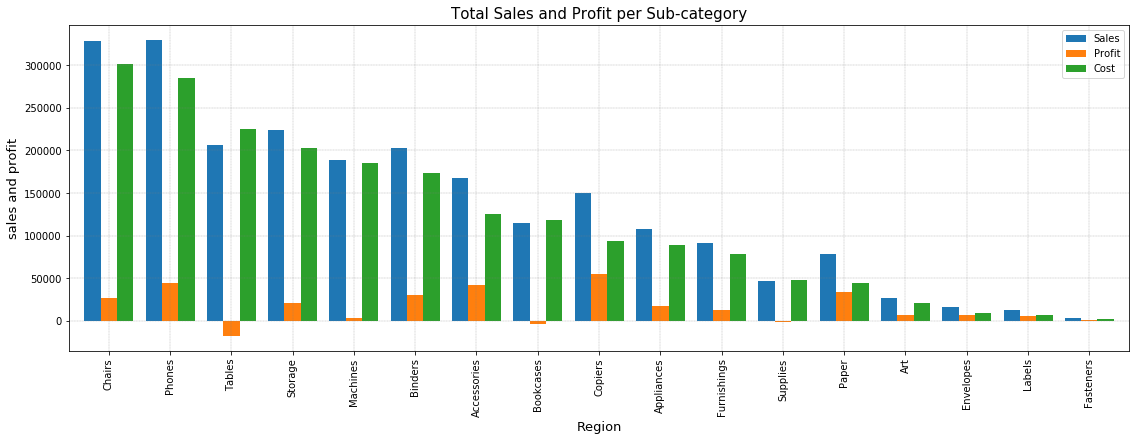

In [31]:
sale_profit_sum = superstore.groupby('Sub-Category')['Sales','Profit','Cost'].agg('sum').reset_index()
sale_profit_sum = sale_profit_sum.sort_values(by="Cost",ascending=False)
sale_profit_sum = sale_profit_sum.set_index(sale_profit_sum.columns[0])
sale_profit_sum.plot.bar(width=0.8,figsize=(19,6))
plt.title("Total Sales and Profit per Sub-category", fontsize=15)
plt.xlabel("Region", fontsize=13)
plt.ylabel("sales and profit",fontsize=13)
plt.grid(color='gray', linestyle='--', linewidth=0.3)

**Analysis** - Table is among the top 3 categories based on cost and is also the least Profit making category

## **Thank You**